#### 전국어린이보호구역표준데이터
 * CCTV 설치 대수가 없을 경우, Y이면 1, N이면 0으로 대체
- 시설종류별 CCTV 설치여부 카운트 / 대수
- 광역시도별, 시설 종류별 카운트
- 관할경찰서별 CCTV 설치 대수
- CCTV평균 설치 대수
- 도로폭/ CCTV 설치 대수 상관도

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_rawdata = pd.read_csv('전국어린이보호구역표준데이터.csv',encoding='cp949')
colum_selection = ['시설종류','관할경찰서명','CCTV설치여부','CCTV설치대수','제공기관명','보호구역도로폭']
pd_data = pd_rawdata[colum_selection]
del pd_rawdata
#print(pd_data[:3])

In [2]:
# EDA : Exploratory Data Analysis
print(pd_data.columns)
print(pd_data.dtypes)

pd_data['시설종류'] = pd_data['시설종류'].astype('category')
pd_data['CCTV설치여부'] = pd_data['CCTV설치여부'].astype('category')
#print(pd_data.dtypes)
#print(pd_data.shape)
#pd_data.describe(include='all')
print(pd_data['보호구역도로폭'].value_counts())
print(pd_data['보호구역도로폭'].isna().value_counts())

Index(['시설종류', '관할경찰서명', 'CCTV설치여부', 'CCTV설치대수', '제공기관명', '보호구역도로폭'], dtype='object')
시설종류         object
관할경찰서명       object
CCTV설치여부     object
CCTV설치대수    float64
제공기관명        object
보호구역도로폭      object
dtype: object
6          1600
8          1334
7           855
10          558
12          543
           ... 
30~35         1
12~50         1
5.0~5.5       1
6~45          1
18~23         1
Name: 보호구역도로폭, Length: 528, dtype: int64
False    10684
True      4372
Name: 보호구역도로폭, dtype: int64


In [3]:
for e in pd_data:
    print(e,pd_data[e].hasnans)
    if pd_data[e].hasnans == True:
        print(pd_data[e].isna().value_counts())

시설종류 False
관할경찰서명 False
CCTV설치여부 False
CCTV설치대수 True
False    11682
True      3374
Name: CCTV설치대수, dtype: int64
제공기관명 False
보호구역도로폭 True
False    10684
True      4372
Name: 보호구역도로폭, dtype: int64


In [4]:
# CCTV결측치 처리
print(pd_data['CCTV설치대수'].isna().value_counts())

filter_y = pd_data['CCTV설치여부'] == 'Y'
filter_n = pd_data['CCTV설치여부'] == 'N'
pd_data.loc[filter_y,'CCTV설치대수'] = pd_data.loc[filter_y,'CCTV설치대수'].replace(np.NaN,1)
pd_data.loc[filter_n,'CCTV설치대수'] = pd_data.loc[filter_n,'CCTV설치대수'].replace(np.NaN,0)

#pd_data.replace({'CCTV설치여부':'Y','CCTV설치대수':np.NaN},1,inplace=True)
#pd_data.replace({'CCTV설치여부':'N','CCTV설치대수':np.NaN},0,inplace=True)

print(pd_data['CCTV설치대수'].isna().value_counts())

False    11682
True      3374
Name: CCTV설치대수, dtype: int64
False    15056
Name: CCTV설치대수, dtype: int64


In [5]:
def myfn1(x):
    if type(x) == type(' '):
        if '~' in x:
            m = np.array(x.split('~')).astype(np.float64).mean()
            return str(m)

# 도로폭 : 오류치 처리
# 숫자 ~ 숫자 형태의 문자열 -> 평균치 np.float64 값으로 대체
#print(pd_data['보호구역도로폭'].value_counts())
y = pd_data['보호구역도로폭'].apply(myfn1)
#print(pd_data['보호구역도로폭'].value_counts())
#print(y.value_counts())


# 도로폭 : 결측치 처리
# 전체 도로폭 평균치로 대처
print(pd_data['보호구역도로폭'].isna().value_counts())
y = y.astype(np.float64)
y = y.replace(np.NaN,y.mean())
print(y.isna().value_counts())
pd_data['보호구역도로폭'] = y


False    10684
True      4372
Name: 보호구역도로폭, dtype: int64
False    15056
Name: 보호구역도로폭, dtype: int64


In [6]:
for e in pd_data:
    print(e,pd_data[e].hasnans)
    if pd_data[e].hasnans == True:
        print(pd_data[e].isna().value_counts())

시설종류 False
관할경찰서명 False
CCTV설치여부 False
CCTV설치대수 False
제공기관명 False
보호구역도로폭 False


#### 시설종류
* dtype : category
* value : 
* 결측치 없음
#### 관할경찰서명
* dtype : object
* 결측치 없음
#### CCTV 설치여부
* dtype : category
* value : 'Y','N'
* 결측치 없음
#### CCTV 설치대수
* dtype : np.int64
* min/ max : 0 / _
* 결측치 (개)
    - CCTV 설치여부 'Y' --> 1
    - CCTV 설치여부 'N' --> 0
#### 보호구역 도로폭
* dtype : np.float64
* min/max
* 오류치 (   개,처리후 오류치 없음)
    - 숫자 ~ 숫자 형태의 문자열 -> 평균치 np.float64 값으로 대체
* 결측치 (  개,처리후 결측 없음)
    - 전체 평균값으로 대체

In [7]:
#print(pd_data)
#print(pd_data['보호구역도로폭'].value_counts())
g1 = pd_data.groupby('시설종류')
#print(g1)
#g1.count()
#g1['CCTV설치대수'].sum()

In [8]:
g2 = pd_data.groupby(['제공기관명','시설종류'])
g2.count()

관할경찰서명  CCTV설치여부  CCTV설치대수  보호구역도로폭
제공기관명    시설종류                                          
강원도 강릉시  국제학교            0         0         0        0
         대안학교            0         0         0        0
         어린이집            6         6         6        6
         외국인교육기관         0         0         0        0
         외국인학교           0         0         0        0
...                    ...       ...       ...      ...
충청북도 충주시 유치원            44        44        44       44
         초등학교           38        38        38       38
         초등학교+어린이집       0         0         0        0
         특수학교            3         3         3        3
         학원              0         0         0        0

[2250 rows x 4 columns]

In [9]:
pd_data['CCTV설치대수'].mean()

2.118026036131775

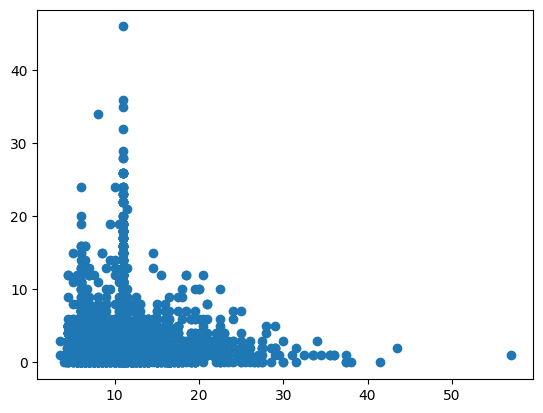

In [10]:
x = pd_data['보호구역도로폭']
y = pd_data['CCTV설치대수']
np.corrcoef(x,y)

_, axe = plt.subplots()
axe.scatter(x,y)

In [13]:
# 조건이 1개 일 때
df_t = pd.DataFrame({'a':[1,1,2,2],'b': [5,6,5,6]})
print(df_t)
f1 = df_t['a'] ==1
print("*****")
print(df_t.loc[f1,:])
print("replace")
df_t.loc[f1,'b'] = 100
print(df_t)


   a  b
0  1  5
1  1  6
2  2  5
3  2  6
*****
   a  b
0  1  5
1  1  6
replace
   a    b
0  1  100
1  1  100
2  2    5
3  2    6


In [ ]:
# 조건이 2개일때
df_t = pd.DataFrame({'a':[1,1,2,2],'b': [5,6,5,6]})
print(df_t)
f1 = df_t['a'] ==1
print("*****")
print(df_t.loc[f1,:])
print("replace")
df_t.loc[f1,'b'] = df_t.loc[f1,'b'].replace(6,100)
print(df_t)

In [12]:
import sklearn
from sklearn import datasets
x = datasets.load_diabetes()
print(x)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  